In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\marketing_campaign.csv",sep="\t")


In [3]:
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [5]:
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

bool_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

category_columns = ['Education', 'Marital_Status']

date_columns = ['Year_Birth', 'Dt_Customer']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
income_missing = df[df['Income'].isna()]
income_missing

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [8]:
group_means = df.groupby('Education')['Income'].mean()

#Impute missing values in the "Income" column
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')  

#Find the maximum (and minimum date to check) in the 'Dt_Customer' column
max_date = df['Dt_Customer'].max() 
min_date = df['Dt_Customer'].min()
print("The newest customer's enrolment date in the records:", max_date)
print("The oldest customer's enrolment date in the records:", min_date)

#Calculate the number of days between the enrolment date and the maximum date
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days) 

#Calculate age of customers
df['Age'] = 2022 - df['Year_Birth']

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [10]:
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status:  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [11]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")


#Segment education levels in three groups
df['Education'] = df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})

                                           
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduate        1127
Postgraduate     856
Undergrade       257
Name: Education, dtype: int64
Values of Marital Status:  Partner    1444
Alone       796
Name: Marital_Status, dtype: int64


In [12]:
df['Children'] = df['Kidhome'] + df['Teenhome']

#Calculate the total members in the household
df['Family_Size'] = df['Marital_Status'].replace({"Alone" : 1, "Partner" : 2}) + df['Children']

#Check pertain parenthood
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [13]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalNumPurchases'] = df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases

In [14]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis = 1)

In [15]:
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('The total number of data points after removing outliers:', len(df))

The total number of data points after removing outliers: 2236


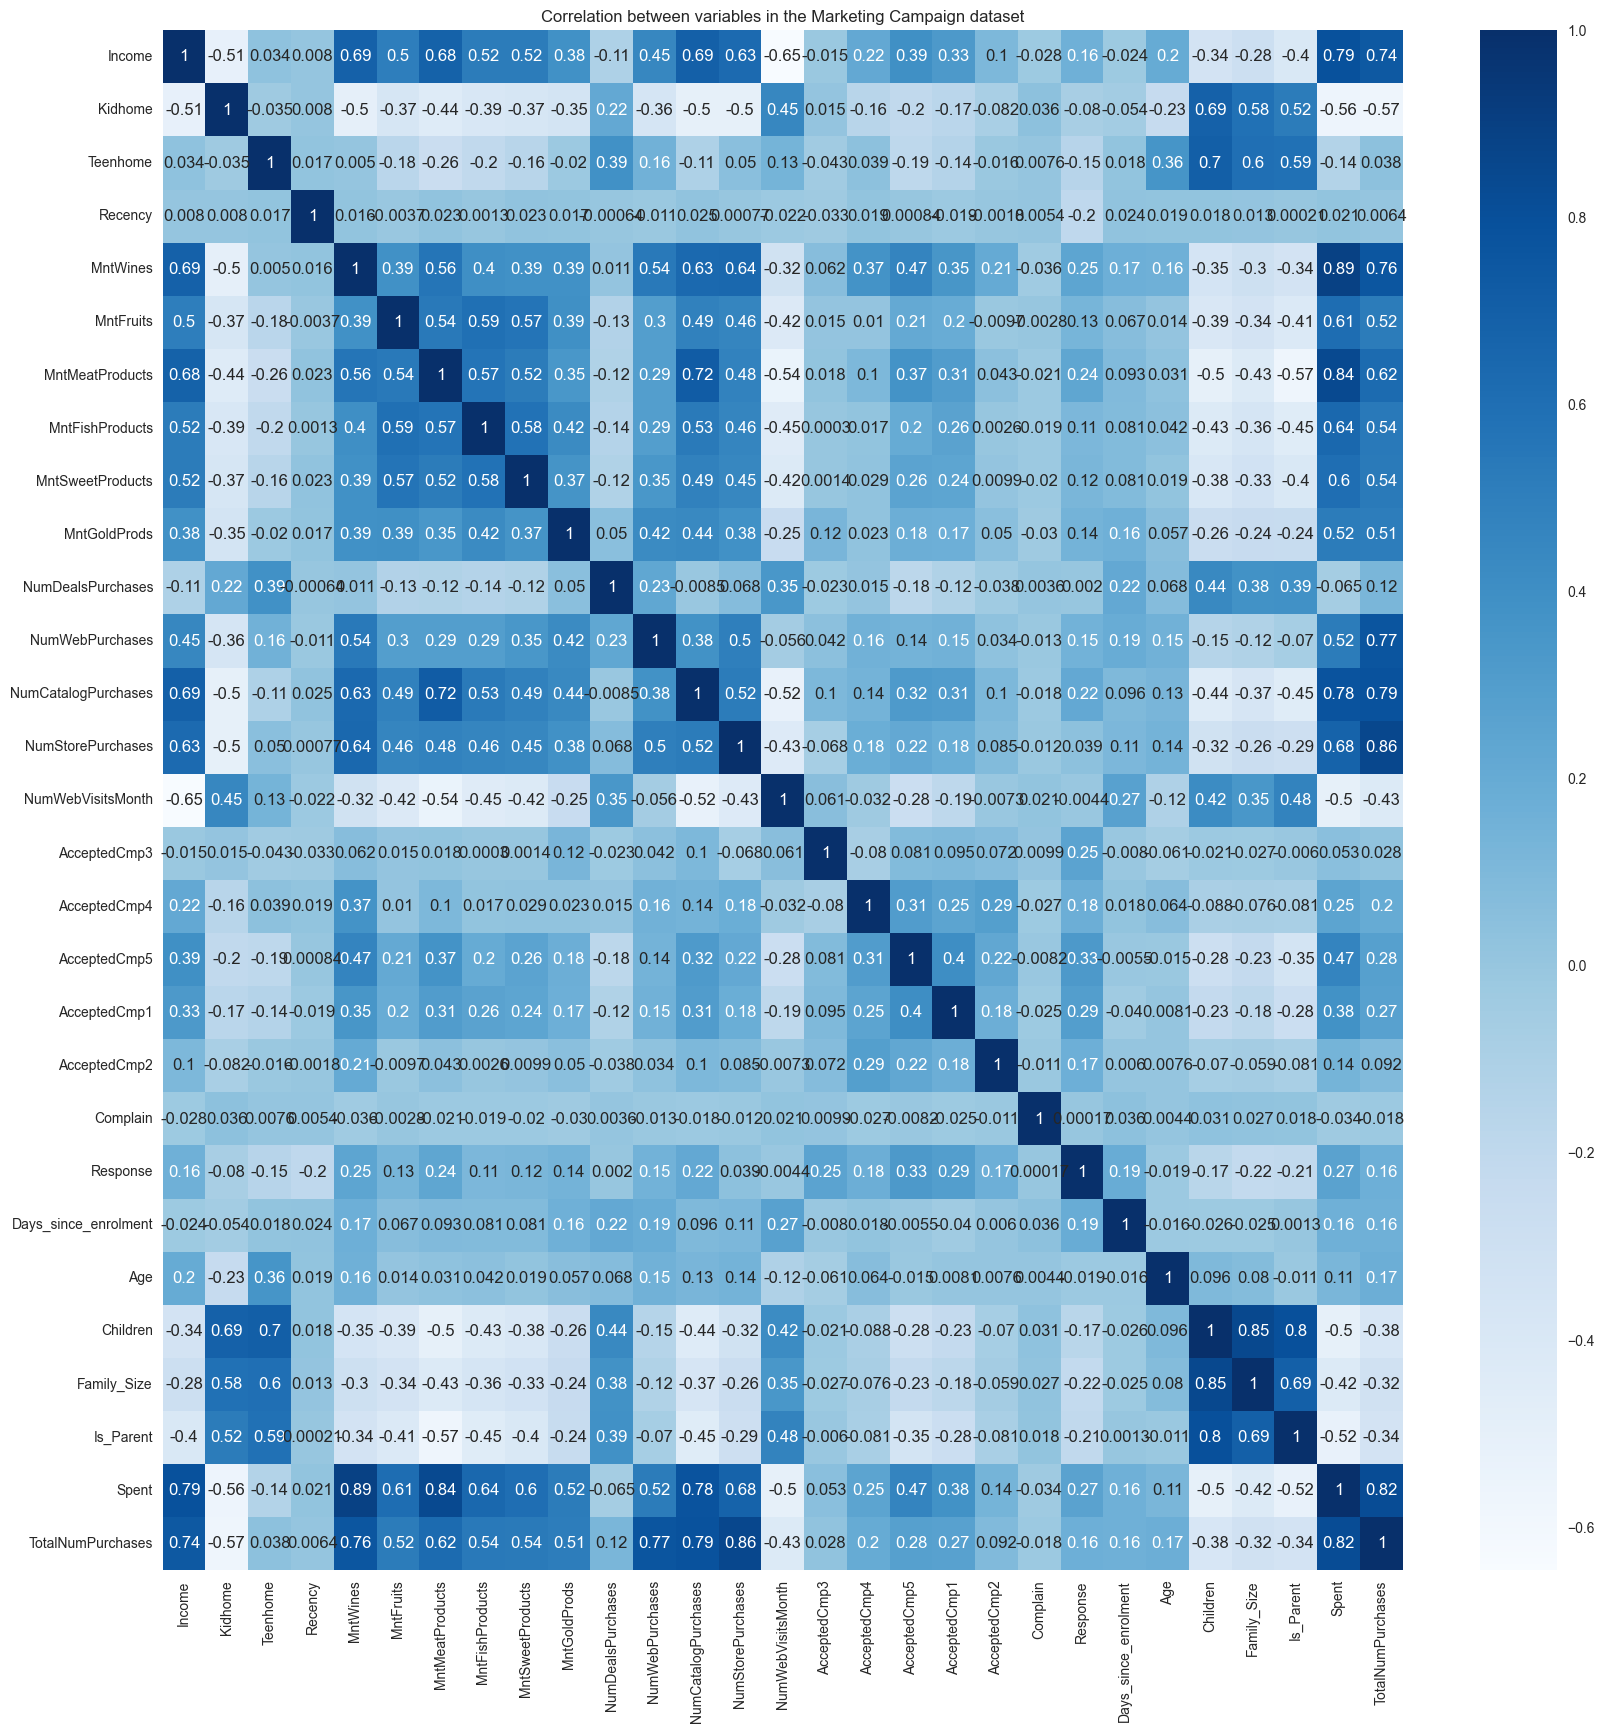

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),cmap="Blues",
            annot = True)
plt.title('Correlation between variables in the Marketing Campaign dataset')
plt.show()

In [17]:
le = LabelEncoder()

#copy original dataset
ds = df.copy()
# select categorical columns
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

# label encode each column in the list
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])
    
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   int32  
 1   Marital_Status        2236 non-null   int32  
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Recency               2236 non-null   int64  
 6   MntWines              2236 non-null   int64  
 7   MntFruits             2236 non-null   int64  
 8   MntMeatProducts       2236 non-null   int64  
 9   MntFishProducts       2236 non-null   int64  
 10  MntSweetProducts      2236 non-null   int64  
 11  MntGoldProds          2236 non-null   int64  
 12  NumDealsPurchases     2236 non-null   int64  
 13  NumWebPurchases       2236 non-null   int64  
 14  NumCatalogPurchases   2236 non-null   int64  
 15  NumStorePurchases    

In [18]:
df_before_scale = ds.drop(bool_columns, axis = 1) #new data frame with numeric

# create an instance of the StandardScaler class
scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_before_scale)


# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

In [19]:
pca = PCA()

# Fit PCA on scaled data
pca.fit(df_scaled)

PCA()

In [20]:
pca = PCA(n_components = 3)

# Using the three chosen components, fit the model to our data.
pca.fit(df_scaled)

# The calculated resulting components scores for the elements in our data set:
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3'])

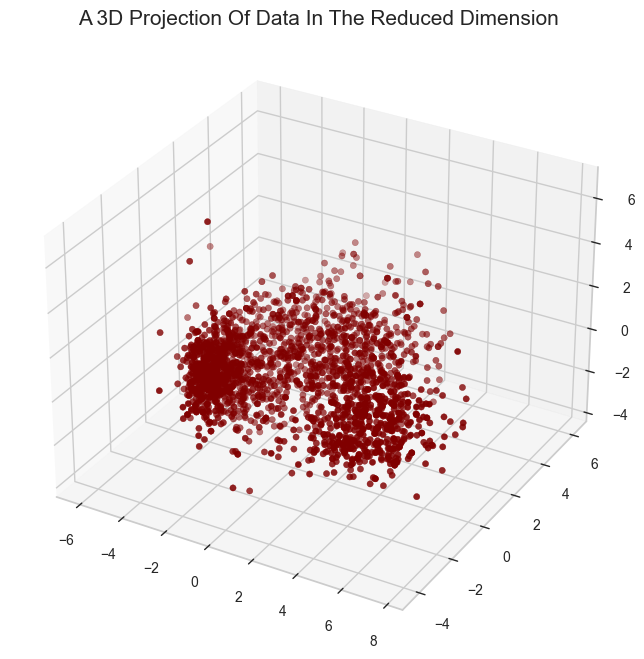

In [22]:
x =df_pca["D1"]
y =df_pca["D2"]
z =df_pca["D3"]
#To plot
fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y,z, c="maroon", marker="o" )
a.set_title("A 3D Projection Of Data In The Reduced Dimension", size=15)
plt.show()

Elbow Method to determine the number of clusters to be formed:


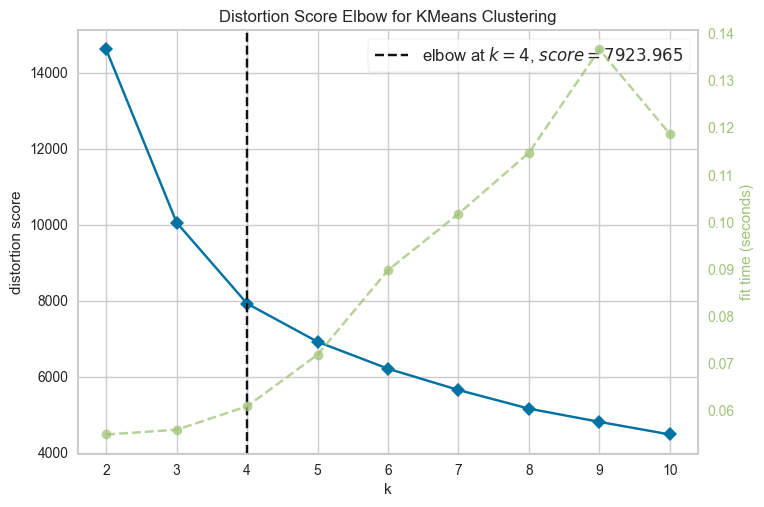

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [36]:
cmap = colors.ListedColormap(["#FF4040", "000000", "#7FFF00", "#8B4513", "#00EEEE", "#CD950C"])

In [25]:
#Initiating the Agglomerative Clustering model 
KM = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KM = KM.fit_predict(df_pca)
df_pca["Clusters"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_KM

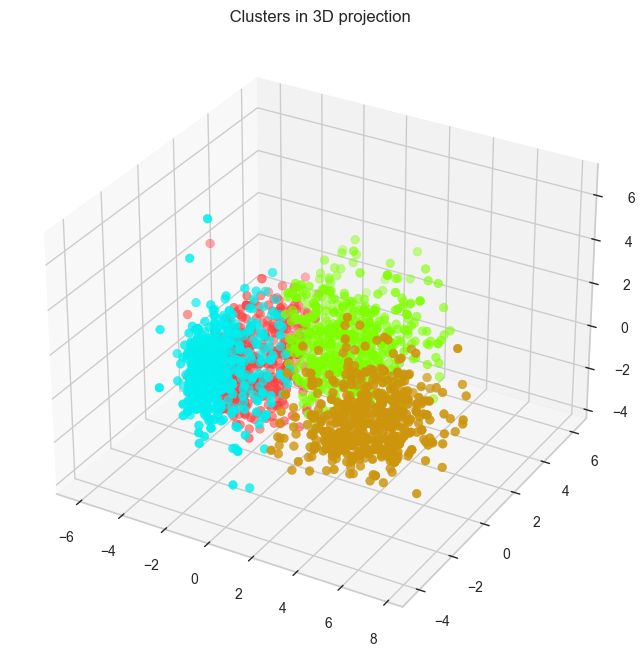

In [41]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o', cmap=cmap)
ax.set_title(" Clusters in 3D projection")
plt.show()

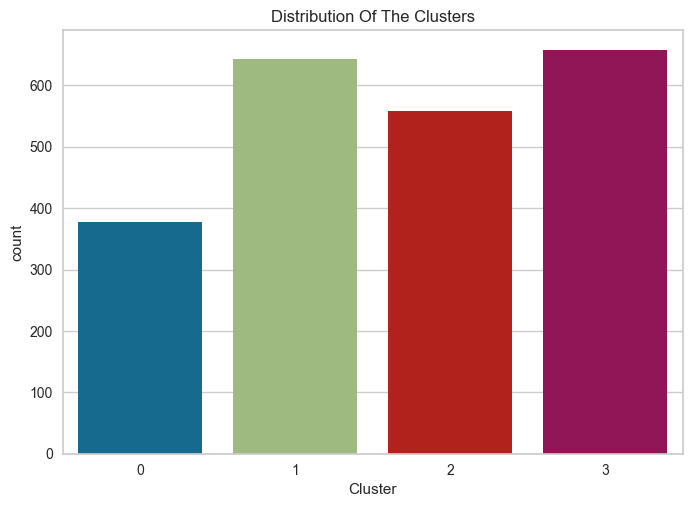

In [46]:
df#drop redundant columns
fin_df=df

fin_df

#After visualizing and creating the features it looks like we can now proceed to clustering the customers and we can begin by encoding some of our categorical data

#Encode categorical data 
encode = LabelEncoder()
fin_df['Education']=encode.fit_transform(fin_df['Education'])
fin_df['Marital_Status']=encode.fit_transform(fin_df['Marital_Status'])
fin_df

#Got an error about infinite values and I used this to check where the infinite values were
np.isinf(fin_df.iloc[:]).sum()

#replace infinite values with null and then drop the null rows
fin_df.replace([np.inf, -np.inf], np.nan, inplace=True)
fin_df.dropna(axis = 0,inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis = 0,inplace=True)
np.all(np.isfinite(fin_df))
True
#scale the values for kmeans clustering
features = ['Income', 'Spent']
fin_df2 = fin_df[features]
fin_df2 = (fin_df2 - fin_df2.mean(axis=0)) / fin_df2.std(axis=0)
#fin_df2 = (fin_df - fin_df.mean(axis=0)) / fin_df.std(axis=0)

#cluster using kmeans
kmeans = KMeans(n_clusters=4, random_state=0)
fin_df["Cluster"] = kmeans.fit_predict(fin_df2)
df['Cluster']=fin_df['Cluster']
#chcek the distribution of the clusters
pl = sns.countplot(x=fin_df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

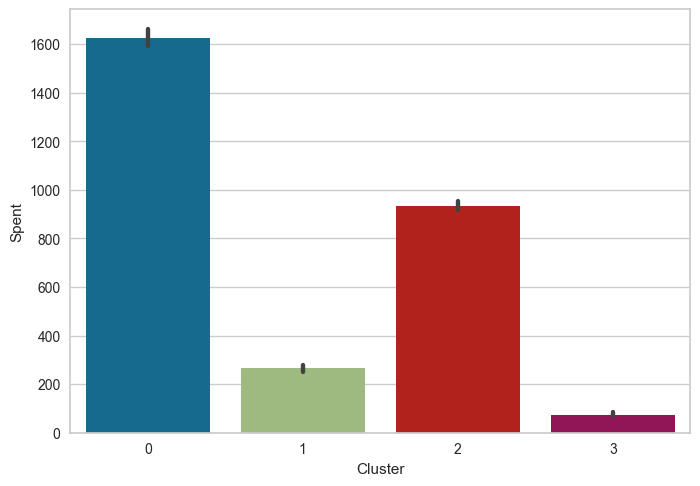

In [55]:
plt.figure()
#pl=sns.swarmplot(x=df["Cluster"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.barplot(x=df["Cluster"], y=df["Spent"])
plt.show()

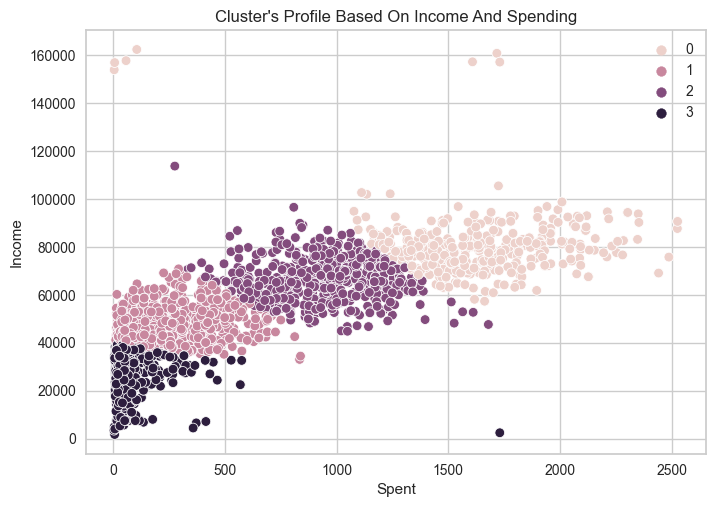

In [51]:
pl = sns.scatterplot(data = fin_df,x=fin_df["Spent"], y=fin_df["Income"],hue=fin_df["Cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Cluster 0:High spent and high income
Cluster 1:Low spent and medium income
Cluster 2:High spent and medium income
Cluster 3:Low spent and low income

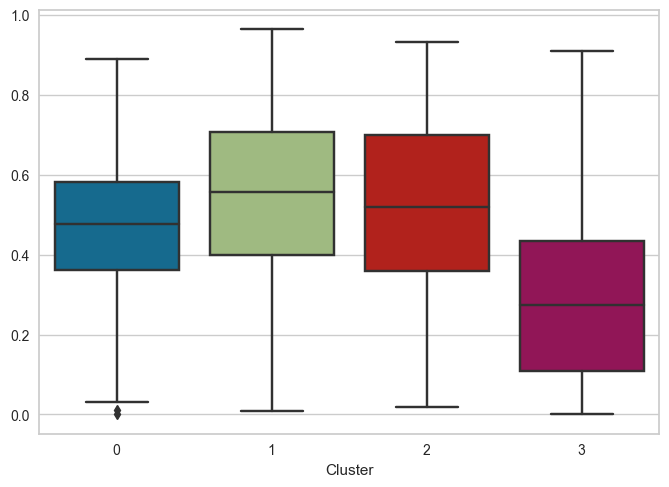

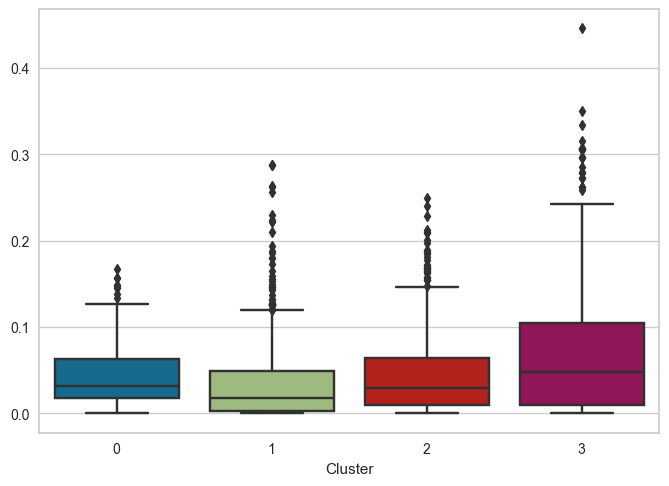

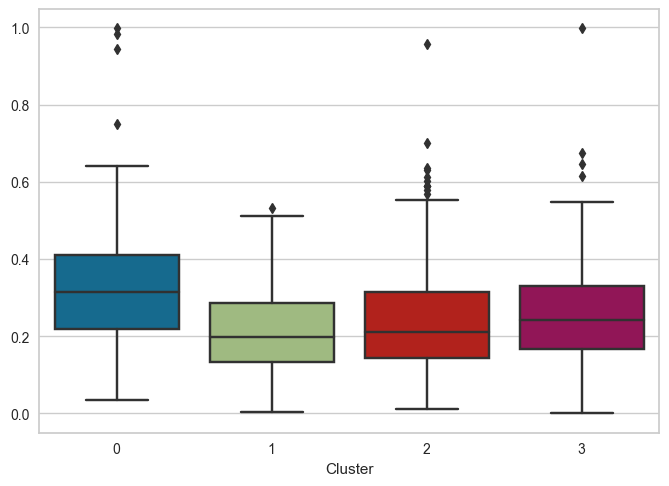

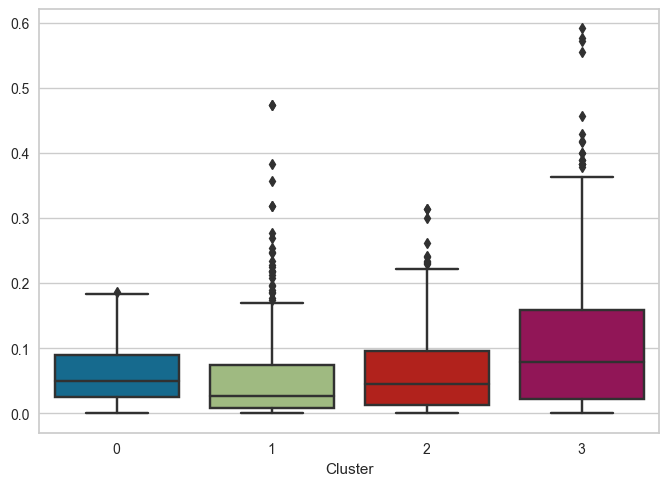

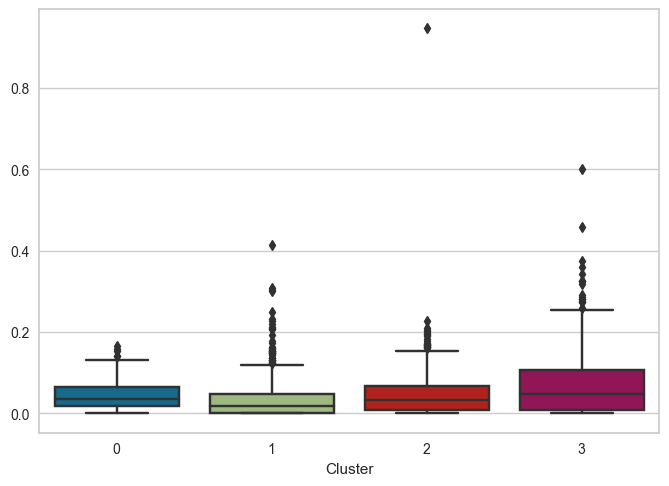

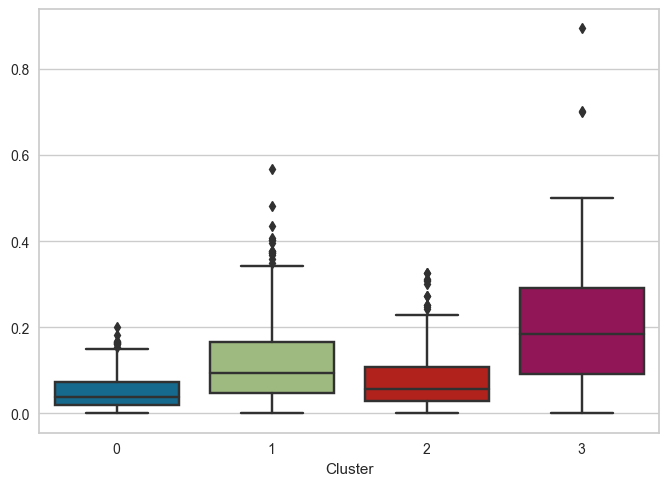

In [26]:
product = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts", "MntGoldProds"]

for i in product:
    plt.figure()
    sns.boxplot(y=(fin_df[i]/fin_df['Spent']),  x=fin_df["Cluster"], )
    plt.show()

<Figure size 800x550 with 0 Axes>

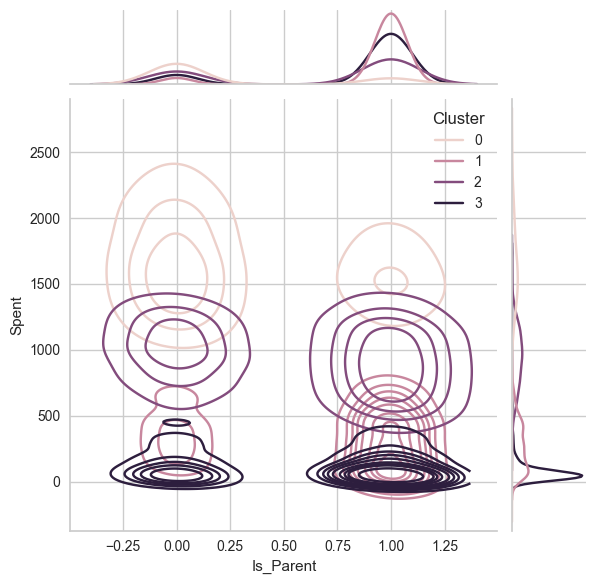

<Figure size 800x550 with 0 Axes>

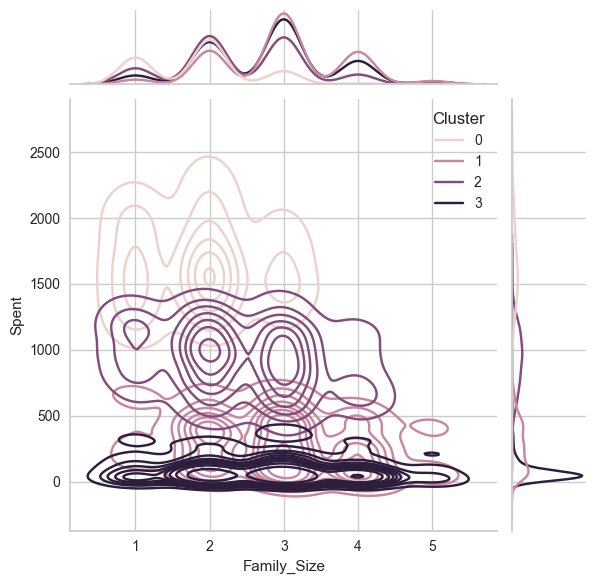

<Figure size 800x550 with 0 Axes>

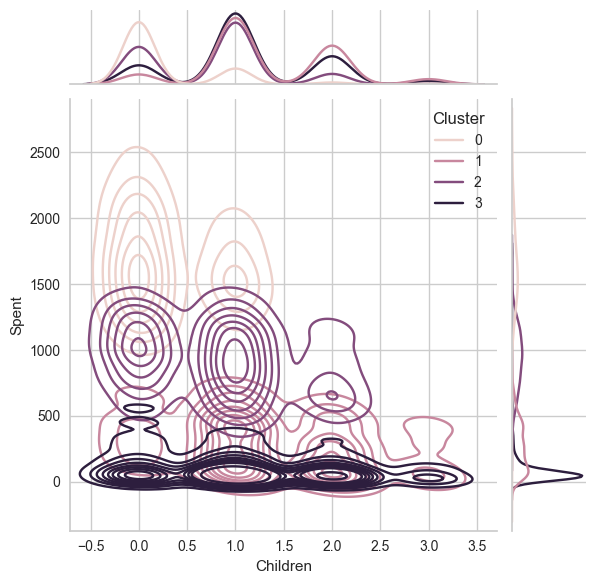

<Figure size 800x550 with 0 Axes>

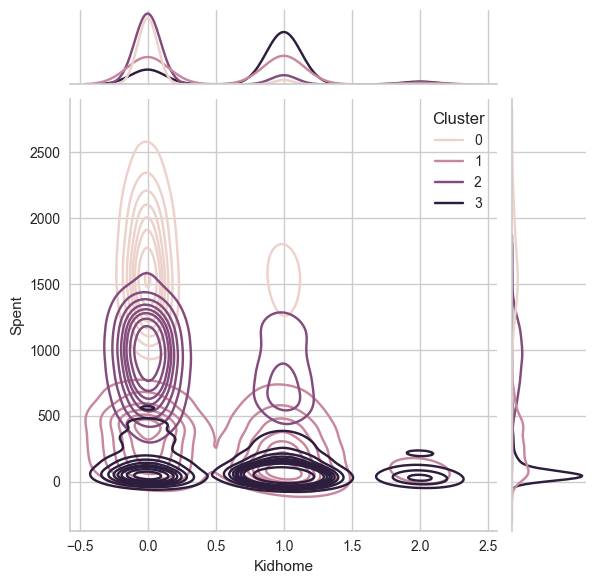

<Figure size 800x550 with 0 Axes>

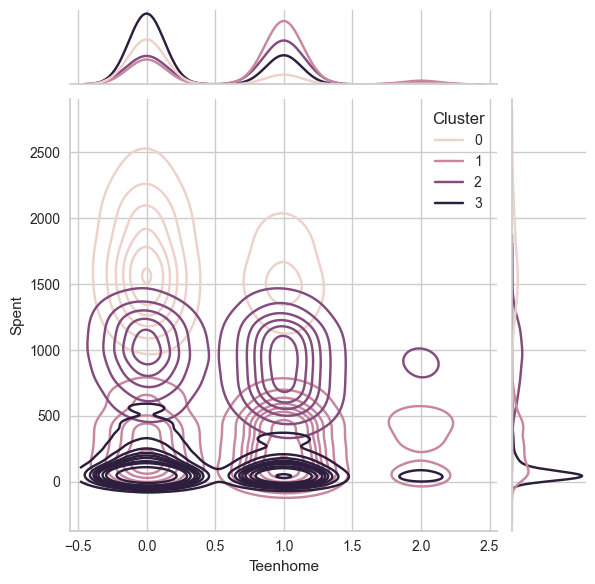

<Figure size 800x550 with 0 Axes>

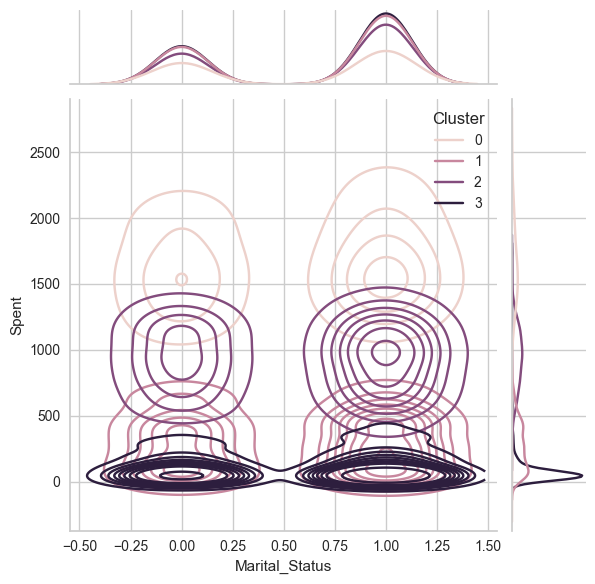

<Figure size 800x550 with 0 Axes>

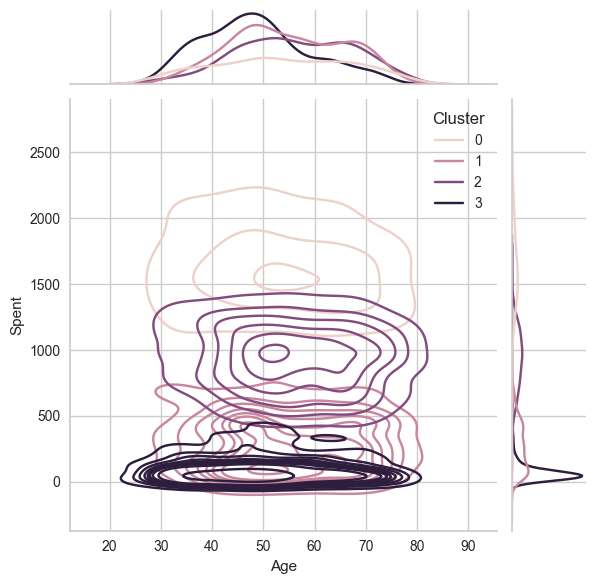

<Figure size 800x550 with 0 Axes>

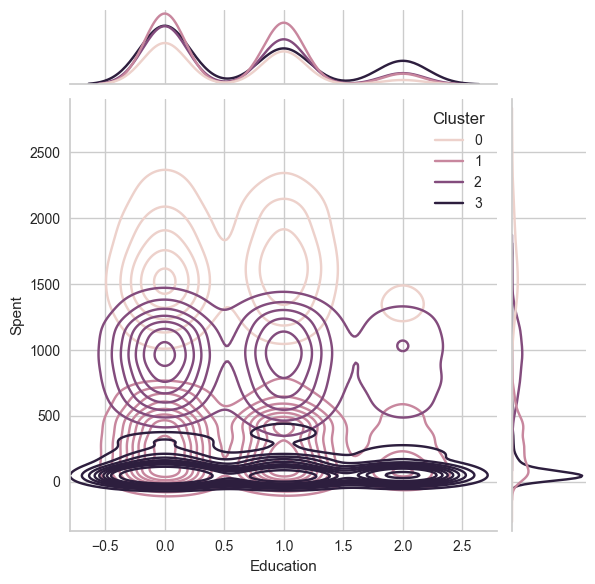

In [27]:
Personal = ["Is_Parent", "Family_Size", "Children", "Kidhome","Teenhome",
            "Marital_Status", "Age", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ds[i], y=df["Spent"], hue =df["Cluster"], kind="kde")
    plt.show()